# Project: Cloud-Based Machine Learing CAK part

# Passenger

In this project, the data of Air Traffic Passenger Statistics:

Ref. : https://data.sfgov.org/Transportation/Air-Traffic-Passenger-Statistics/rkru-6vcg

Group Students: Singgih Bekti, Shakeel Ahmed, Phing Lim

Date: Apirl, 16th 2021

### Necessary Libraries 

In [1]:
import requests
import pandas as pd
from pandas.io.json import json_normalize
#from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt #ใช้ plot graph
import numpy as np
from sklearn import datasets, neighbors
import itertools
import random
from sklearn.cluster import KMeans
import csv

### Get Response:  
Getting the response from API we use:

In [2]:
response = requests.get("https://data.sfgov.org/resource/rkru-6vcg.json")

### See Response Code (you should get 200 OK)


For more information : https://developer.mozilla.org/en-US/docs/Web/HTTP/Status

Code: 200 --> means that response is successfull

In [3]:
print(response.status_code)

200


### Let's See The Raw Data 

In [4]:
print(response.json())


[{'activity_period': '202012', 'operating_airline': 'Horizon Air', 'operating_airline_iata_code': 'QX', 'published_airline': 'Alaska Airlines', 'published_airline_iata_code': 'AS', 'geo_summary': 'Domestic', 'geo_region': 'US', 'activity_type_code': 'Enplaned', 'price_category_code': 'Other', 'terminal': 'Terminal 2', 'boarding_area': 'D', 'passenger_count': '4604'}, {'activity_period': '202012', 'operating_airline': 'Singapore Airlines', 'operating_airline_iata_code': 'SQ', 'published_airline': 'Singapore Airlines', 'published_airline_iata_code': 'SQ', 'geo_summary': 'International', 'geo_region': 'Asia', 'activity_type_code': 'Deplaned', 'price_category_code': 'Other', 'terminal': 'International', 'boarding_area': 'G', 'passenger_count': '167'}, {'activity_period': '202012', 'operating_airline': 'Korean Air Lines', 'operating_airline_iata_code': 'KE', 'published_airline': 'Korean Air Lines', 'published_airline_iata_code': 'KE', 'geo_summary': 'International', 'geo_region': 'Asia', 'a

To make it easy to see, we are able to see the data as table

In [5]:
ps=pd.read_json('https://data.sfgov.org/resource/rkru-6vcg.json')
ps

,activity_period,operating_airline,operating_airline_iata_code,published_airline,published_airline_iata_code,geo_summary,geo_region,activity_type_code,price_category_code,terminal,boarding_area,passenger_count
0,202012,Horizon Air,QX,Alaska Airlines,AS,Domestic,US,Enplaned,Other,Terminal 2,D,4604
1,202012,Singapore Airlines,SQ,Singapore Airlines,SQ,International,Asia,Deplaned,Other,International,G,167
2,202012,Korean Air Lines,KE,Korean Air Lines,KE,International,Asia,Deplaned,Other,International,A,937
3,202012,SkyWest Airlines,OO,Delta Air Lines,DL,Domestic,US,Enplaned,Other,Terminal 1,C,6916
4,202012,EVA Airways,BR,EVA Airways,BR,International,Asia,Enplaned,Other,International,G,1322
...,...,...,...,...,...,...,...,...,...,...,...,...
995,202002,Sun Country Airlines,SY,Sun Country Airlines,SY,Domestic,US,Deplaned,Low Fare,International,A,4317
996,202002,Swiss International,LX,Swiss International,LX,International,Europe,Deplaned,Other,International,G,7478
997,202002,Sun Country Airlines,SY,Sun Country Airlines,SY,Domestic,US,Enplaned,Low Fare,International,A,4316
998,202002,Swiss International,LX,Swiss International,LX,International,Europe,Enplaned,Other,International,G,6491


### Testing Plot Number of passengers by Flight from Feb-Dec 2020

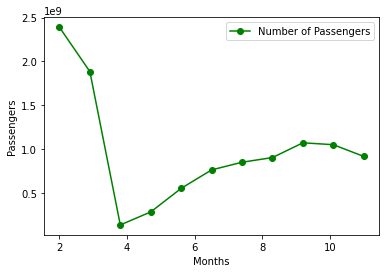

In [6]:
#response = requests.get("https://data.sfgov.org/resource/rkru-6vcg.json")
#print(response.status_code)

#data given as Table, pandas should be use here!
response = pd.read_json("https://data.sfgov.org/resource/rkru-6vcg.json") #<-- Data read in pandas
pd_data = response[["activity_period","operating_airline","passenger_count"]]

my_array = pd_data.to_numpy()
#print(my_array)

dates2020 = my_array[:,0]
airline2020 = my_array[:,1] #Store data of Airline Company
num_pass2020 = my_array[:,2]

#pass_air = (airline == 'Horizon Air')
#pass_air = 1*pass_air

#print(pass_air)
#Our data can provide only 10 months:
Months2020 = np.array([202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012])
allpass2020 = []

for month2020 in Months2020:    
    import numpy as geek
    g_dates2020 = geek.ones([len(dates2020), 1], dtype = int)
    g_dates2020 = month2020*g_dates2020
    #print(g_dates)
    Dec2020 = (dates2020 == g_dates2020)
    Dec2020 = 1*Dec2020
    #print(Dec)
# Calculate number of Passengers for every months in 2020
    pass_air_dec_2020 = num_pass2020*Dec2020
    num_pass_air_2020 = np.sum(pass_air_dec_2020)
    #print(num_pass_air)
    allpass2020.append({"num_pass_air":num_pass_air_2020, "month": month2020})
# list data:
allpass2020_2 = pd.DataFrame(allpass2020)
#print(allpass2)
# X is numbers of passengers - Y is month (February --> Decmember)
X2020 = allpass2020_2.iloc[:, 0].values
y2020 = allpass2020_2.iloc[:, 1].values
Y2020 = np.linspace(2,len(y2020),len(y2020))
#print(X,Y)

plt.plot(Y2020, X2020, 'o-', color= 'g', label= "Number of Passengers")
plt.ylabel('Passengers')
plt.xlabel('Months')
plt.legend()
plt.show()

## K-Mean 

### Prepare data set X : Operating Period  and Y : Number of Passengers of all Airline in July 2019 until December 2020

We take more data from July 2019 until January 2020.

In [7]:
# Data from July 2019 until January 2020:
response_add = pd.read_json("https://data.sfgov.org/resource/rkru-6vcg.json?$where=activity_period%20%3E%20201906")
pd_data_add = response_add[["activity_period","operating_airline","passenger_count"]]

# Array of DATA add:
my_array_add = pd_data_add.to_numpy()

Combine DATA from July 2019 - January 2020 and Feb 2020 - Dec 2020

In [8]:
alldata = np.concatenate([my_array_add, my_array])
df = alldata[:,(0,2)]
print(df)

[[201907 6220]
 [201907 5485]
 [201907 9291]
 ...
 [202002 4316]
 [202002 6491]
 [202002 114738]]


In [9]:
kmean=KMeans(n_clusters=5)
label = kmean.fit(df)
label

KMeans(n_clusters=5)

In [10]:
centriods = kmean.cluster_centers_
centriods
#kmean.n_iter_

array([[201918.16129032, 259956.90322581],
       [201962.4347326 ,   6531.50201265],
       [201909.5       , 471951.41666667],
       [201942.72222222, 138789.09722222],
       [201965.83561644,  47729.70547945]])

In [11]:
labels = kmean.labels_
labels

array([1, 1, 1, ..., 1, 1, 3])

In [12]:
y_kmean = kmean.fit_predict(df)
print(y_kmean)
len(y_kmean)

[2 2 2 ... 2 2 4]


2000

In [ ]:
#plotting the results:

for i in y_kmean:
    plt.scatter(df[y_kmean == i , 0], df[y_kmean == i , 1], label = i)
    
plt.xlabel('Activity Period')
plt.ylabel('Number of Passengers')
plt.show()

In [ ]:
all_pd_data = pd.DataFrame(alldata, columns=['Activity Period','Airline','Number Passengers'])
print(labels)
for i in labels:
    all_pd_data = all_pd_data.assign(Q = labels[i])
    
all_pd_data

### Saving Output

#### write CSV output file
since our data is the panda dataframe, we can use to_cvs to convert output to csv.

In [ ]:
compression_opts = dict(method='zip', archive_name = 'output.csv')
all_pd_data.to_csv('output.zip', index=False, compression = compression_opts)

Previously we show the data using K-Means for making us easy to understand the data. 
We can not see all the data one by one, but using clustering method, we can cluster the data then we can see it clearly. It is essential for helping us to decide what to do. 

#  Color Segmentation Using K-Means
In this case, K-Means will be used for color clustering for football. This is important for us to understand how K-Means can be used for. 

# Color Clustering
Let's prepare the necessary libraries

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

Next, in this step, defining the image in RGB color space

In [ ]:
original_image = cv2.imread("C:/Users/Singgih/Downloads/football.jpg") #football.jpg
plt.imshow(original_image)

We need to convert our image from RGB Colours Space to HSV to work ahead.

Because, according to wikipedia the R, G, and B components of an object’s color in a digital image are all correlated with the amount of light hitting the object, and therefore with each other, image descriptions in terms of those components make object discrimination difficult. Descriptions in terms of hue/lightness/chroma or hue/lightness/saturation are often more relevant.

In [ ]:
img=cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)
plt.imshow(img)

Next, converts the MxNx3 image into a Kx3 matrix where K=MxN and each row is now a vector in the 3-D space of RGB.

In [ ]:
vectorized = img.reshape((-1,3))

Then, We need to convert the unit8 values to float as it is a requirement of the k-means method of OpenCV.

In [ ]:
vectorized = np.float32(vectorized)

We will do cluster with k = 6

Because if you look at the image above it has 6 colors, green-colored grass and dark green, red-team, white-team, red-shadow, white-shadow.

Define criteria, number of clusters(K) and apply k-means()

In [ ]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

OpenCV provides cv2.kmeans(samples, nclusters(K), criteria, attempts, flags) function for color clustering.

1. samples: It should be of np.float32 data type, and each feature should be put in a single column.

2. nclusters(K): Number of clusters required at the end

3. criteria: It is the iteration termination criteria. When this criterion is satisfied, the algorithm iteration stops. 

Actually, it should be a tuple of 3 parameters. They are `( type, max_iter, epsilon )`:


Type of termination criteria. It has 3 flags as below:

cv.TERM_CRITERIA_EPS — stop the algorithm iteration if specified accuracy, epsilon, is reached.

cv.TERM_CRITERIA_MAX_ITER — stop the algorithm after the specified number of iterations, max_iter.

cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER — stop the iteration when any of the above condition is met.


4. attempts: Flag to specify the number of times the algorithm is executed using different initial labelings. The algorithm returns the labels that yield the best compactness. This compactness is returned as output.


5. flags: This flag is used to specify how initial centers are taken. Normally two flags are used for this: 

cv.KMEANS_PP_CENTERS and cv.KMEANS_RANDOM_CENTERS.

In [ ]:
K = 6
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS) 

Now convert back into uint8.

In [ ]:
center = np.uint8(center)

Access the labels to regenerate the clustered image

In [ ]:
res = center[label.flatten()]
result_image = res.reshape((img.shape))

Now, compare the pictures

In [ ]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

From that case, computer will understand about the image easily and inform us what image is that and the contain inside